<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/Week7/Week7_Movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

### The train_label is list of 0s and 1s. 0 means negative else 1 means positive

In [4]:
train_label

array([1, 0, 0, ..., 0, 1, 0])

### We restricted words with in 10000 most frequent words, so that no word index will exceed 10000

In [5]:
max([max(seq) for seq in train_data])

9999

### mapping word index by using get_word_index

In [8]:
word_idx = imdb.get_word_index()

reverse_word_idx = dict([(val, key) for (key, val) in word_idx.items()])

decoded = ' '.join([reverse_word_idx.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
decoded

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
import numpy as np

def seq_to_vec(sequences, dimension=10000):
  res = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    res[i, seq] = 1.
  return res

train_x = seq_to_vec(train_data)
test_x = seq_to_vec(test_data)

In [15]:
train_x.shape


(25000, 10000)

### We have to also vectorize target data!!

In [16]:
train_y = np.asarray(train_label).astype('float32')
test_y = np.asarray(test_label).astype('float32')

In [17]:
train_y

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [18]:
train_y.shape

(25000,)

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### validating approach

In [24]:
val_x = train_x[:10000]
partial_train_x = train_x[10000:]

val_y = train_y[:10000]
partial_train_y = train_y[10000:]

In [25]:
his = model.fit(partial_train_x, partial_train_y, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/20
30/30 [==============================] - 4s 37ms/step - loss: 0.5827 - accuracy: 0.7157 - val_loss: 0.3788 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3133 - accuracy: 0.9032 - val_loss: 0.3003 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2209 - accuracy: 0.9315 - val_loss: 0.2764 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1620 - accuracy: 0.9498 - val_loss: 0.2773 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1293 - accuracy: 0.9617 - val_loss: 0.3151 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1034 - accuracy: 0.9716 - val_loss: 0.3431 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0842 - accuracy: 0.9787 - val_loss: 0.3402 - val_accuracy: 0.8810
Epoch 8/20
30

In [26]:
his_res = his.history
his_res.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Visualizing

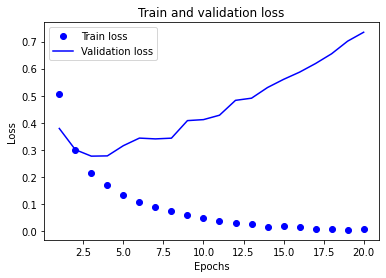

In [27]:
import matplotlib.pyplot as plt

acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Train loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
plt.clf()

<Figure size 432x288 with 0 Axes>

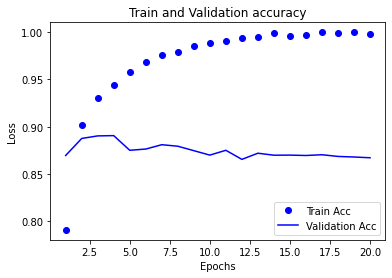

In [30]:
acc_val = his_res["accuracy"]
val_acc_values = his_res["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Train Acc")
plt.plot(epochs, val_acc, 'b', label="Validation Acc")
plt.title("Train and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=4, batch_size=512)
results = model.evaluate(test_x,test_y)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.5883 - accuracy: 0.7238
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2930 - accuracy: 0.9039
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2130 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3216 - accuracy: 0.8719


In [33]:
results

[0.32160869240760803, 0.8719199895858765]

# Using model predict method

In [34]:
model.predict(test_x)

array([[0.12959053],
       [0.9998702 ],
       [0.67827594],
       ...,
       [0.09452005],
       [0.0490065 ],
       [0.3984639 ]], dtype=float32)